# TESTANDO MODELOS - MACHINE LEARNING

In [10]:
#CARREGANDO PACOTES
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score



# Caminho do arquivo salvo (ajuste o caminho se necessário)
caminho_arquivo = r"../data/processed/ml_iq_2018_2023.csv"

# Carregar o DataFrame
ml_iq_2018_2023 = pd.read_csv(caminho_arquivo)


Rodando ML com Regressão Logistica

In [11]:
#RODANDO ML COM REGRESSÃO LOGISTICA

df = pd.read_csv(caminho_arquivo)

variaveis_preditoras = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

X = df[variaveis_preditoras]
y = df['TDA_binaria']  # variável alvo binária criada anteriormente

# Dividir em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.5906344410876133

Matriz de Confusão:
 [[193 143]
 [128 198]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.57      0.59       336
           1       0.58      0.61      0.59       326

    accuracy                           0.59       662
   macro avg       0.59      0.59      0.59       662
weighted avg       0.59      0.59      0.59       662



c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Rodando ML com Modelo K-means

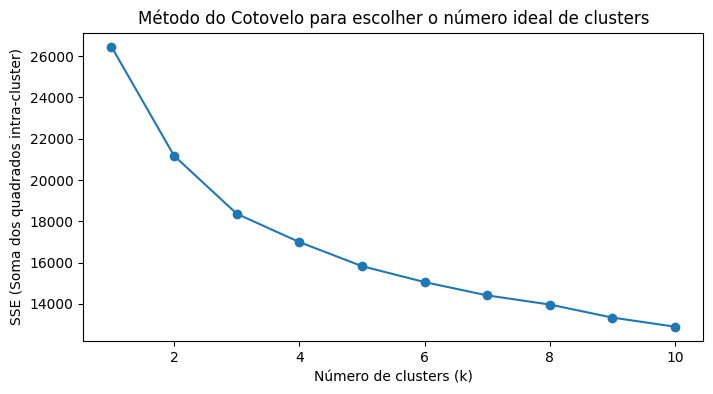

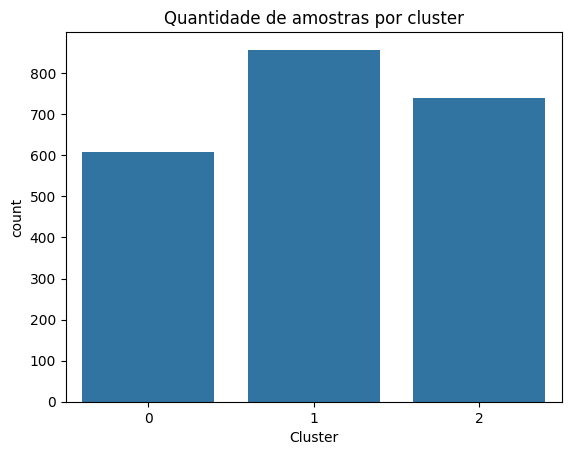

         NOTA_PADRONIZADA_-_IDD  \
Cluster                           
0                      2.368663   
1                      3.167609   
2                      2.391479   

         NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA  \
Cluster                                                       
0                                                 2.926707    
1                                                 2.781384    
2                                                 1.862136    

         NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS  \
Cluster                                                            
0                                                 2.841997         
1                                                 2.985799         
2                                                 1.885432         

         NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO  \
Cluster                                                             
0                            

In [12]:
#RODANDO ML COM MODELO K-MEANS

# Carregar os dados (ajuste o caminho se precisar)
caminho_arquivo = r"../data/processed/ml_iq_2018_2023.csv"
df = pd.read_csv(caminho_arquivo)

# Variáveis para clusterização (mesmas usadas na regressão)
variaveis = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

X = df[variaveis]

# Escalar os dados para melhorar o desempenho do K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Escolha do número de clusters (k) - usando método do cotovelo
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot do método do cotovelo para ajudar a escolher k
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (Soma dos quadrados intra-cluster)')
plt.title('Método do Cotovelo para escolher o número ideal de clusters')
plt.savefig("../outputs/visualizations/Met_cotovelo_qtd_ideal_clusters_modelos.png")
plt.show()

# Vamos supor que você escolha k=3 (ajuste conforme o gráfico)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar a coluna dos clusters no DataFrame original
df['Cluster'] = clusters

# Visualizar a distribuição dos clusters
sns.countplot(x='Cluster', data=df)
plt.title('Quantidade de amostras por cluster')
plt.savefig("../outputs/visualizations/qtd_amostra_por_cluster_modelos.png")
plt.show()

# Visualizar a média das variáveis por cluster
print(df.groupby('Cluster')[variaveis].mean())


Melhorando modelo:

Fazendo tuning de hiperparâmetros;

Comparando com outro algoritmo (Random Forest);

Usando os clusters como nova feature.

In [13]:
# RODANDO ML - TUNING, COMPARAÇÃO, CLUSTER COMO VARIAVEL -> OUTPUTS (VISUALIZAÇÕES)

# === 1. Carregar os dados ===
df = pd.read_csv(r"../data/processed/ml_iq_2018_2023.csv")

variaveis = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

X = df[variaveis]
y = df['TDA_binaria']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# === 2. Tuning com GridSearch ===
def aplicar_gridsearch(modelo, param_grid):
    grid = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_score_, grid.best_params_

param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 5, 10]}
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

melhor_rf, score_rf, param_rf = aplicar_gridsearch(RandomForestClassifier(random_state=42), param_grid_rf)
melhor_lr, score_lr, param_lr = aplicar_gridsearch(LogisticRegression(max_iter=1000), param_grid_lr)
melhor_knn, score_knn, param_knn = aplicar_gridsearch(KNeighborsClassifier(), param_grid_knn)

# === 3. Comparacao dos modelos ===
modelos_melhores = {
    "Random Forest": melhor_rf,
    "Logistic Regression": melhor_lr,
    "KNN": melhor_knn
}

resultados = []
for nome, modelo in modelos_melhores.items():
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados.append((nome, acc))

df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Acurácia"]).sort_values(by="Acurácia", ascending=False)
print("\nComparacao dos modelos:")
print(df_resultados)

# === Visualizacao das Acurácias ===
os.makedirs("../outputs/visualizations", exist_ok=True)
sns.barplot(x="Acurácia", y="Modelo", data=df_resultados)
plt.title("Comparação de Acurácia entre Modelos")
plt.xlabel("Acurácia")
plt.ylabel("Modelo")
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig("../outputs/visualizations/acuracia_modelos.png")
plt.close()

# === 4. Usar Cluster como Feature ===
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
X_cluster = pd.concat([X, df['Cluster']], axis=1)
X_cluster_scaled = scaler.fit_transform(X_cluster)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cluster_scaled, y, test_size=0.3, random_state=42)
modelo_cluster = RandomForestClassifier(random_state=42)
modelo_cluster.fit(X_train_c, y_train_c)
y_pred_c = modelo_cluster.predict(X_test_c)

print("\nRandom Forest com Cluster:")
print("Acurácia:", accuracy_score(y_test_c, y_pred_c))
print("Relatório:\n", classification_report(y_test_c, y_pred_c))

# === Visualizar Matriz de Confusão ===
matriz = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Matriz de Confusão - Random Forest com Cluster")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.savefig("../outputs/visualizations/matriz_confusao_rf_cluster.png")
plt.close()

# === Visualização de Clusters com PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title("Visualização dos Clusters (KMeans) com PCA")
plt.tight_layout()
plt.savefig("../outputs/visualizations/clusters_pca.png")
plt.close()

# === ROC Curve para o melhor modelo ===
from sklearn.metrics import roc_auc_score
import numpy as np

modelo = melhor_rf
if hasattr(modelo, "predict_proba"):
    y_score = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (área = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Curva ROC - Melhor Modelo')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("../outputs/visualizations/roc_curve_melhor_modelo.png")
    plt.close()





Comparacao dos modelos:
                Modelo  Acurácia
0        Random Forest  0.666163
1  Logistic Regression  0.596677
2                  KNN  0.580060

Random Forest com Cluster:
Acurácia: 0.6706948640483383
Relatório:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67       336
           1       0.66      0.67      0.67       326

    accuracy                           0.67       662
   macro avg       0.67      0.67      0.67       662
weighted avg       0.67      0.67      0.67       662



Usando RFE para selecionar 5 variáveis importantes;

Usando RFECV para descobrir o número ótimo de variáveis com validação cruzada.


Modelo: RandomForest
RFE - Variáveis selecionadas: ['NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_DOUTORES', 'IGC_(CONTÍNUO)', 'SALARIO']
Acurácia: 0.6439909297052154
Matriz de Confusão:
 [[139  82]
 [ 75 145]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64       221
           1       0.64      0.66      0.65       220

    accuracy                           0.64       441
   macro avg       0.64      0.64      0.64       441
weighted avg       0.64      0.64      0.64       441

RFECV - Variáveis selecionadas: ['NOTA_PADRONIZADA_-_IDD', 'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA', 'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_MESTRES', 'NOTA_PADRONIZADA_-_DOUTORES', 'MEDIA_CONCEITO_ENADE_(CONTÍNUO)', 'IDD_(CONTÍ

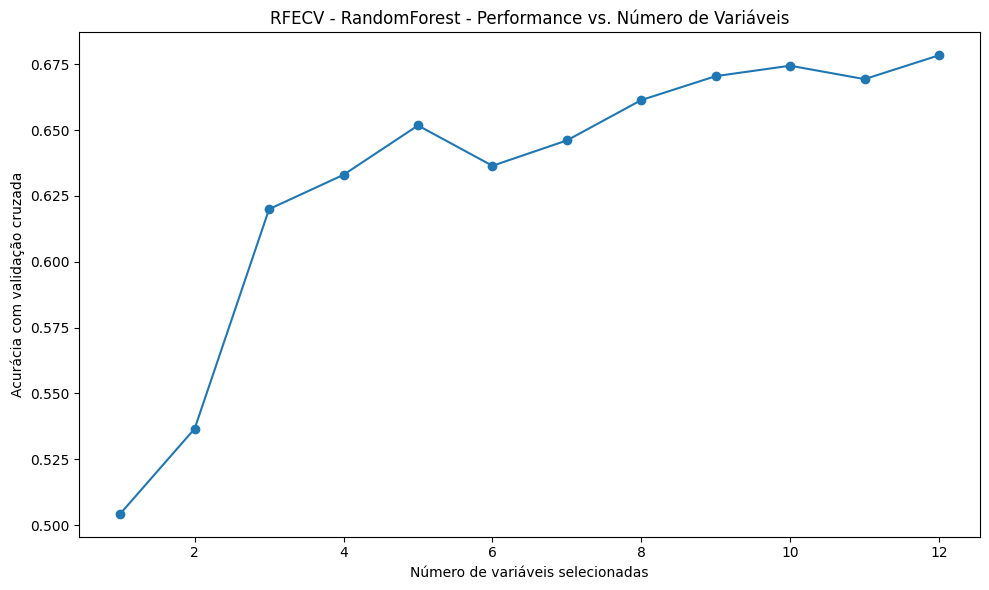


Modelo: LogisticRegression


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE - Variáveis selecionadas: ['NOTA_PADRONIZADA_-_IDD', 'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'IDD_(CONTÍNUO)', 'CONCEITO_MÉDIO_DE_GRADUAÇÃO', 'IGC_(CONTÍNUO)']
Acurácia: 0.6009070294784581
Matriz de Confusão:
 [[126  95]
 [ 81 139]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.57      0.59       221
           1       0.59      0.63      0.61       220

    accuracy                           0.60       441
   macro avg       0.60      0.60      0.60       441
weighted avg       0.60      0.60      0.60       441



c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number 

RFECV - Variáveis selecionadas: ['NOTA_PADRONIZADA_-_IDD', 'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA', 'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_MESTRES', 'NOTA_PADRONIZADA_-_DOUTORES', 'MEDIA_CONCEITO_ENADE_(CONTÍNUO)', 'IDD_(CONTÍNUO)', 'CONCEITO_MÉDIO_DE_GRADUAÇÃO', 'IGC_(CONTÍNUO)']
RFECV - Acurácia: 0.5941043083900227
RFECV - Matriz de Confusão:
 [[126  95]
 [ 84 136]]
RFECV - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.57      0.58       221
           1       0.59      0.62      0.60       220

    accuracy                           0.59       441
   macro avg       0.59      0.59      0.59       441
weighted avg       0.59      0.59      0.59       441



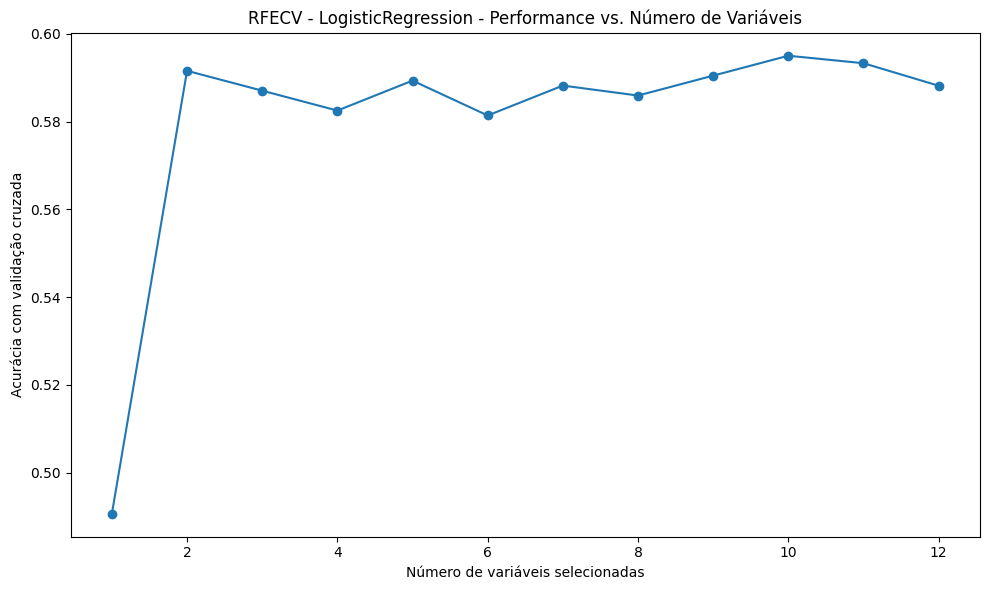


Modelo: KNN (com SelectKBest)
SelectKBest - Variáveis selecionadas: ['NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA', 'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_DOUTORES', 'IGC_(CONTÍNUO)']
KNN - Acurácia: 0.528344671201814
KNN - Matriz de Confusão:
 [[117 104]
 [104 116]]
KNN - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53       221
           1       0.53      0.53      0.53       220

    accuracy                           0.53       441
   macro avg       0.53      0.53      0.53       441
weighted avg       0.53      0.53      0.53       441



In [14]:
#ESCOLHENDO MODELO QUE ÓTIMIZA ACURACIA COM RFE E RFECV

# === 1. Carregar os dados ===
df = pd.read_csv("../data/processed/ml_iq_2018_2023.csv")

variaveis_preditoras = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

X = df[variaveis_preditoras]
y = df['TDA_binaria']

# === 2. Criar diretório de saída ===
output_dir = "../outputs/visualizations"
os.makedirs(output_dir, exist_ok=True)

# === 3. Separar dados em treino/teste ===
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# === 4. Modelos com RFE/RFECV ===
modelos_com_rfe = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

for nome_modelo, modelo in modelos_com_rfe.items():
    print(f"\n{'='*30}\nModelo: {nome_modelo}\n{'='*30}")

    # --- RFE ---
    rfe = RFE(estimator=modelo, n_features_to_select=5)
    rfe.fit(X_train, y_train)

    features_selecionadas = X_train.columns[rfe.support_]
    print("RFE - Variáveis selecionadas:", list(features_selecionadas))

    # Treinar e avaliar modelo com variáveis selecionadas
    modelo.fit(X_train[features_selecionadas], y_train)
    y_pred = modelo.predict(X_test[features_selecionadas])

    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

    # RFECV
    rfecv = RFECV(estimator=modelo, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv.fit(X_train, y_train)

    features_rfecv = X_train.columns[rfecv.support_]
    print("RFECV - Variáveis selecionadas:", list(features_rfecv))

    # Avaliação
    modelo.fit(X_train[features_rfecv], y_train)
    y_pred_rfecv = modelo.predict(X_test[features_rfecv])

    print("RFECV - Acurácia:", accuracy_score(y_test, y_pred_rfecv))
    print("RFECV - Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rfecv))
    print("RFECV - Relatório de Classificação:\n", classification_report(y_test, y_pred_rfecv))

    # Plot da performance do RFECV
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
             rfecv.cv_results_['mean_test_score'], marker='o')
    plt.xlabel("Número de variáveis selecionadas")
    plt.ylabel("Acurácia com validação cruzada")
    plt.title(f"RFECV - {nome_modelo} - Performance vs. Número de Variáveis")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"rfecv_performance_{nome_modelo.lower()}.png"))
    plt.show()

# === 5. KNN com SelectKBest ===
print(f"\n{'='*30}\nModelo: KNN (com SelectKBest)\n{'='*30}")
knn = KNeighborsClassifier()

kbest = SelectKBest(score_func=f_classif, k=5)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

variaveis_kbest = X_train.columns[kbest.get_support()]
print("SelectKBest - Variáveis selecionadas:", list(variaveis_kbest))

# Treinar e avaliar o KNN
knn.fit(X_train_kbest, y_train)
y_pred_knn = knn.predict(X_test_kbest)

print("KNN - Acurácia:", accuracy_score(y_test, y_pred_knn))
print("KNN - Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN - Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))



Separação clara da avaliação do modelo numa função

Tratamento especial para KNN, que não tem coeficientes para RFE, então usa SelectKBest

Salva os relatórios detalhados em CSV

Salva os gráficos do RFECV em PNG

Impressão legível no console


MODELO: RandomForest
RFE - Variáveis selecionadas: ['NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_DOUTORES', 'IGC_(CONTÍNUO)', 'SALARIO']
RFE - Acurácia: 0.6440
RFE - Matriz de Confusão:
 [[139  82]
 [ 75 145]]
RFE - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64       221
           1       0.64      0.66      0.65       220

    accuracy                           0.64       441
   macro avg       0.64      0.64      0.64       441
weighted avg       0.64      0.64      0.64       441

RFECV - Variáveis selecionadas: ['NOTA_PADRONIZADA_-_IDD', 'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA', 'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_MESTRES', 'NOTA_PADRONIZADA_-_DOUTORES', 'MEDIA_CONCEITO_ENADE_(CONTÍNUO)', 'IDD_

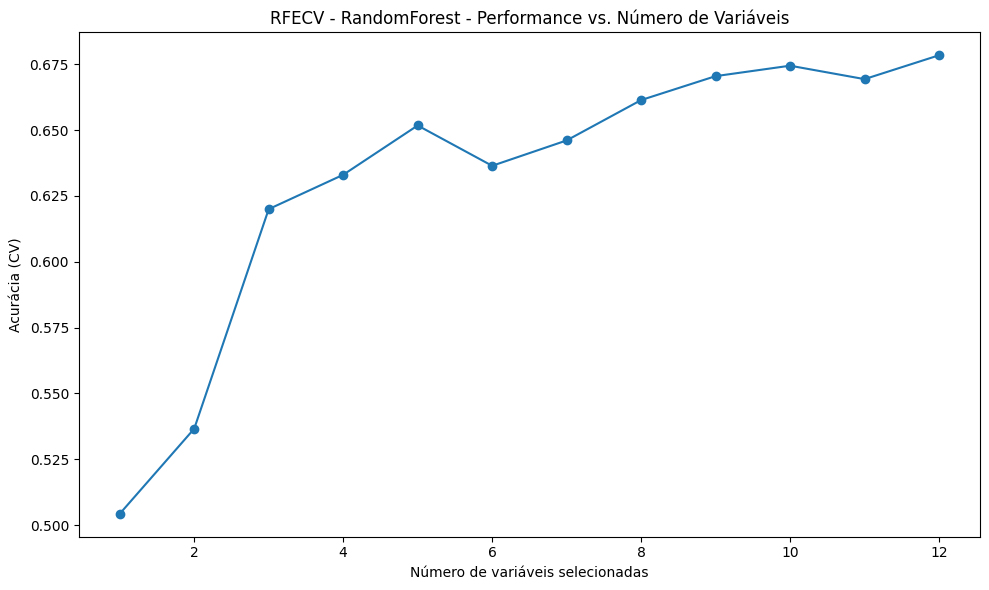


MODELO: LogisticRegression


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE - Variáveis selecionadas: ['NOTA_PADRONIZADA_-_IDD', 'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'IDD_(CONTÍNUO)', 'CONCEITO_MÉDIO_DE_GRADUAÇÃO', 'IGC_(CONTÍNUO)']
RFE - Acurácia: 0.6009
RFE - Matriz de Confusão:
 [[126  95]
 [ 81 139]]
RFE - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.57      0.59       221
           1       0.59      0.63      0.61       220

    accuracy                           0.60       441
   macro avg       0.60      0.60      0.60       441
weighted avg       0.60      0.60      0.60       441



c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number 

RFECV - Variáveis selecionadas: ['NOTA_PADRONIZADA_-_IDD', 'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA', 'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_MESTRES', 'NOTA_PADRONIZADA_-_DOUTORES', 'MEDIA_CONCEITO_ENADE_(CONTÍNUO)', 'IDD_(CONTÍNUO)', 'CONCEITO_MÉDIO_DE_GRADUAÇÃO', 'IGC_(CONTÍNUO)']
RFECV - Acurácia: 0.5941
RFECV - Matriz de Confusão:
 [[126  95]
 [ 84 136]]
RFECV - Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.57      0.58       221
           1       0.59      0.62      0.60       220

    accuracy                           0.59       441
   macro avg       0.59      0.59      0.59       441
weighted avg       0.59      0.59      0.59       441



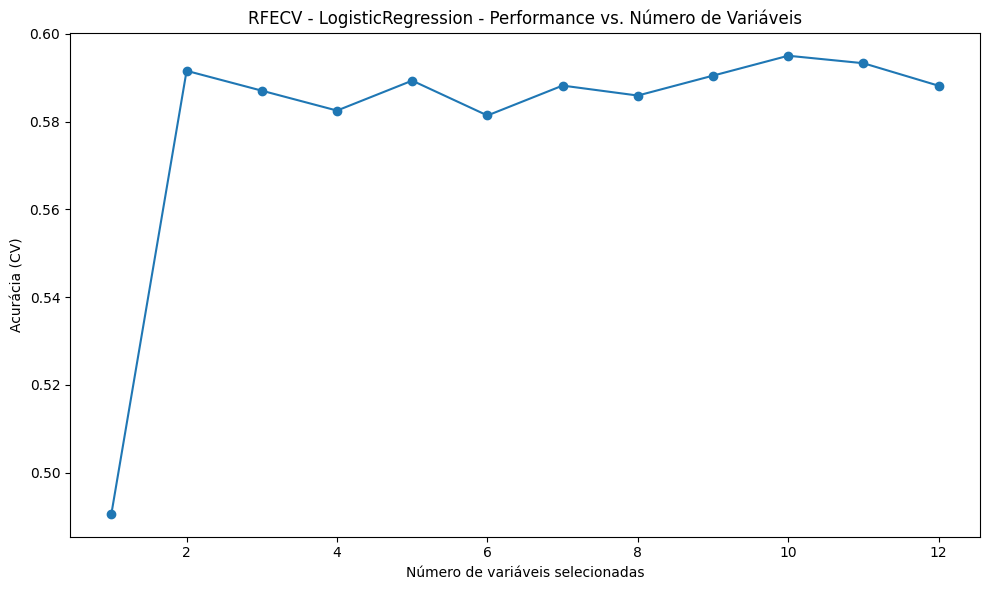


MODELO: KNN
SelectKBest - Variáveis selecionadas: ['NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA', 'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_DOUTORES', 'IGC_(CONTÍNUO)']
Acurácia: 0.5283
Matriz de Confusão:
 [[117 104]
 [104 116]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53       221
           1       0.53      0.53      0.53       220

    accuracy                           0.53       441
   macro avg       0.53      0.53      0.53       441
weighted avg       0.53      0.53      0.53       441


Processo concluído. Relatórios e gráficos salvos nas pastas ../outputs/reports e ../outputs/visualizations


In [15]:

# === 1. Carregar dados ===
df = pd.read_csv("../data/processed/ml_iq_2018_2023.csv")

variaveis_preditoras = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

X = df[variaveis_preditoras]
y = df['TDA_binaria']

# === 2. Criar diretórios de saída ===
output_dir_viz = "../outputs/visualizations"
output_dir_reports = "../outputs/reports"
os.makedirs(output_dir_viz, exist_ok=True)
os.makedirs(output_dir_reports, exist_ok=True)

# === 3. Dividir treino/teste ===
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === 4. Função para avaliação e salvar resultados ===
def avaliar_modelo(modelo, X_treino, y_treino, X_teste, y_teste):
    modelo.fit(X_treino, y_treino)
    y_pred = modelo.predict(X_teste)
    
    acc = accuracy_score(y_teste, y_pred)
    cm = confusion_matrix(y_teste, y_pred)
    cr = classification_report(y_teste, y_pred, output_dict=True)
    
    mse = mean_squared_error(y_teste, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_teste, y_pred)
    
    return {
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': cr,
        'rmse': rmse,
        'r2': r2,
        'y_pred': y_pred
    }

# === 5. Testar modelos com RFE e RFECV ===
modelos = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier()
}

resultados = []

for nome_modelo, modelo in modelos.items():
    print(f"\n{'='*30}\nMODELO: {nome_modelo}\n{'='*30}")
    
    # Para KNN: usar SelectKBest (RFE não funciona)
    if nome_modelo == "KNN":
        kbest = SelectKBest(score_func=f_classif, k=5)
        X_train_sel = kbest.fit_transform(X_train, y_train)
        X_test_sel = kbest.transform(X_test)
        variaveis_sel = X_train.columns[kbest.get_support()]
        print(f"SelectKBest - Variáveis selecionadas: {list(variaveis_sel)}")
        
        res = avaliar_modelo(modelo, X_train_sel, y_train, X_test_sel, y_test)
        print(f"Acurácia: {res['accuracy']:.4f}")
        print("Matriz de Confusão:\n", res['confusion_matrix'])
        print("Relatório de Classificação:\n", classification_report(y_test, res['y_pred']))
        
        # Salvar relatório detalhado
        df_report = pd.DataFrame(res['classification_report']).transpose()
        df_report.to_csv(os.path.join(output_dir_reports, f"{nome_modelo.lower()}_classification_report.csv"))
        
    else:
        # RFE simples
        rfe = RFE(estimator=modelo, n_features_to_select=5)
        rfe.fit(X_train, y_train)
        variaveis_rfe = X_train.columns[rfe.support_]
        print(f"RFE - Variáveis selecionadas: {list(variaveis_rfe)}")
        
        res_rfe = avaliar_modelo(modelo, X_train[variaveis_rfe], y_train, X_test[variaveis_rfe], y_test)
        print(f"RFE - Acurácia: {res_rfe['accuracy']:.4f}")
        print("RFE - Matriz de Confusão:\n", res_rfe['confusion_matrix'])
        print("RFE - Relatório de Classificação:\n", classification_report(y_test, res_rfe['y_pred']))
        
        df_report_rfe = pd.DataFrame(res_rfe['classification_report']).transpose()
        df_report_rfe.to_csv(os.path.join(output_dir_reports, f"{nome_modelo.lower()}_rfe_classification_report.csv"))
        
        # RFECV com CV
        rfecv = RFECV(estimator=modelo, step=1, cv=StratifiedKFold(5), scoring='accuracy')
        rfecv.fit(X_train, y_train)
        variaveis_rfecv = X_train.columns[rfecv.support_]
        print(f"RFECV - Variáveis selecionadas: {list(variaveis_rfecv)}")
        
        res_rfecv = avaliar_modelo(modelo, X_train[variaveis_rfecv], y_train, X_test[variaveis_rfecv], y_test)
        print(f"RFECV - Acurácia: {res_rfecv['accuracy']:.4f}")
        print("RFECV - Matriz de Confusão:\n", res_rfecv['confusion_matrix'])
        print("RFECV - Relatório de Classificação:\n", classification_report(y_test, res_rfecv['y_pred']))
        
        df_report_rfecv = pd.DataFrame(res_rfecv['classification_report']).transpose()
        df_report_rfecv.to_csv(os.path.join(output_dir_reports, f"{nome_modelo.lower()}_rfecv_classification_report.csv"))
        
        # Plot RFECV performance
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
                 rfecv.cv_results_['mean_test_score'], marker='o')
        plt.xlabel("Número de variáveis selecionadas")
        plt.ylabel("Acurácia (CV)")
        plt.title(f"RFECV - {nome_modelo} - Performance vs. Número de Variáveis")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir_viz, f"rfecv_performance_{nome_modelo.lower()}.png"))
        plt.show()
        
print("\nProcesso concluído. Relatórios e gráficos salvos nas pastas ../outputs/reports e ../outputs/visualizations")


Rodar só RandomForest

Adicionar GridSearchCV para hiperparâmetros


Iniciando GridSearchCV para RandomForest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
71 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Tr


Melhores parâmetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Melhor acurácia média no CV: 0.6863169585372135

=== RFE com RandomForest ===
Variáveis selecionadas pelo RFE: ['NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_DOUTORES', 'IGC_(CONTÍNUO)', 'SALARIO']
Acurácia: 0.6417
Matriz de Confusão:
 [[139  82]
 [ 76 144]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64       221
           1       0.64      0.65      0.65       220

    accuracy                           0.64       441
   macro avg       0.64      0.64      0.64       441
weighted avg       0.64      0.64      0.64       441


=== RFECV com RandomForest ===
Variáveis selecionadas pelo RFECV: ['NOTA_PADRONIZADA_-_IDD', 'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA'

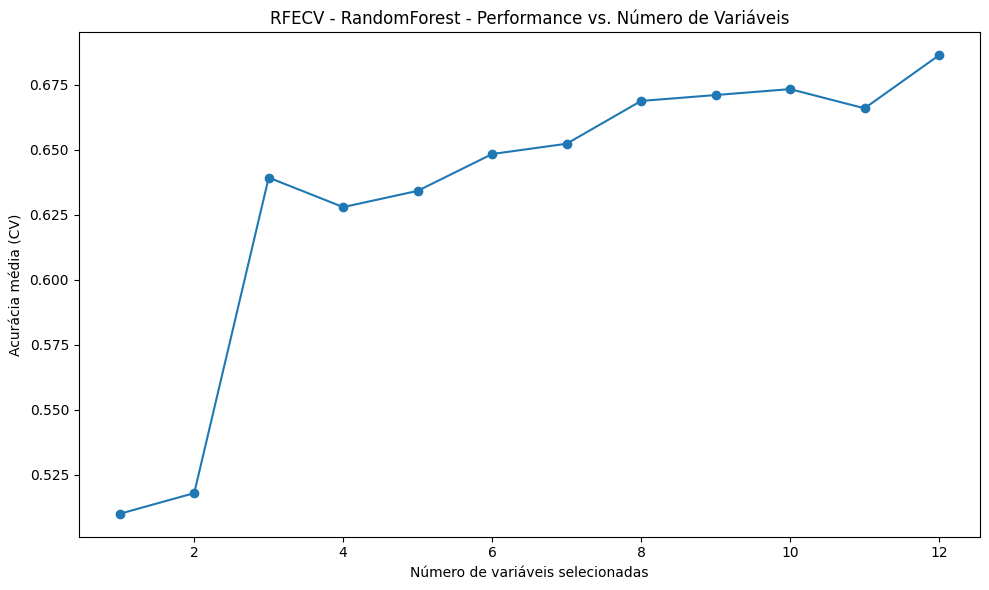


Processo concluído. Relatórios e gráficos salvos nas pastas ../outputs/reports e ../outputs/visualizations


In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# === 1. Carregar dados ===
df = pd.read_csv("../data/processed/ml_iq_2018_2023.csv")

variaveis_preditoras = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

X = df[variaveis_preditoras]
y = df['TDA_binaria']

# === 2. Criar diretórios de saída ===
output_dir_viz = "../outputs/visualizations"
output_dir_reports = "../outputs/reports"
os.makedirs(output_dir_viz, exist_ok=True)
os.makedirs(output_dir_reports, exist_ok=True)

# === 3. Dividir treino/teste ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# === 4. Função para avaliação e salvar resultados ===
def avaliar_modelo(modelo, X_treino, y_treino, X_teste, y_teste):
    modelo.fit(X_treino, y_treino)
    y_pred = modelo.predict(X_teste)

    acc = accuracy_score(y_teste, y_pred)
    cm = confusion_matrix(y_teste, y_pred)
    cr = classification_report(y_teste, y_pred, output_dict=True)

    print(f"Acurácia: {acc:.4f}")
    print("Matriz de Confusão:\n", cm)
    print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))

    return {
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': cr,
        'y_pred': y_pred
    }

# === 5. GridSearch para RandomForest ===
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

print("\nIniciando GridSearchCV para RandomForest...")
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor acurácia média no CV:", grid_search.best_score_)

# Modelo otimizado
melhor_rf = grid_search.best_estimator_

# === 6. Avaliação com RFE (5 variáveis) ===
print("\n=== RFE com RandomForest ===")
rfe = RFE(estimator=melhor_rf, n_features_to_select=5)
rfe.fit(X_train, y_train)
variaveis_rfe = X_train.columns[rfe.support_]
print(f"Variáveis selecionadas pelo RFE: {list(variaveis_rfe)}")

res_rfe = avaliar_modelo(melhor_rf, X_train[variaveis_rfe], y_train, X_test[variaveis_rfe], y_test)

# Salvar relatório RFE
df_report_rfe = pd.DataFrame(res_rfe['classification_report']).transpose()
df_report_rfe.to_csv(os.path.join(output_dir_reports, "randomforest_rfe_classification_report.csv"))

# === 7. Avaliação com RFECV ===
print("\n=== RFECV com RandomForest ===")
rfecv = RFECV(estimator=melhor_rf, step=1, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train, y_train)
variaveis_rfecv = X_train.columns[rfecv.support_]
print(f"Variáveis selecionadas pelo RFECV: {list(variaveis_rfecv)}")

res_rfecv = avaliar_modelo(melhor_rf, X_train[variaveis_rfecv], y_train, X_test[variaveis_rfecv], y_test)

# Salvar relatório RFECV
df_report_rfecv = pd.DataFrame(res_rfecv['classification_report']).transpose()
df_report_rfecv.to_csv(os.path.join(output_dir_reports, "randomforest_rfecv_classification_report.csv"))

# === 8. Plot RFECV performance (para versões recentes sklearn) ===
plt.figure(figsize=(10, 6))

n_features_range = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)
mean_scores = rfecv.cv_results_['mean_test_score']

plt.plot(n_features_range, mean_scores, marker='o')
plt.xlabel("Número de variáveis selecionadas")
plt.ylabel("Acurácia média (CV)")
plt.title("RFECV - RandomForest - Performance vs. Número de Variáveis")
plt.tight_layout()
plt.savefig(os.path.join(output_dir_viz, "rfecv_performance_randomforest.png"))
plt.show()

print("\nProcesso concluído. Relatórios e gráficos salvos nas pastas ../outputs/reports e ../outputs/visualizations")


RandomizedSearchCV + GridSearchCV refinado com class_weight junto com RFE e RFECV

Rodamos primeiro um RandomizedSearchCV com 30 combinações para encontrar parâmetros promissores.

Depois fazemos um GridSearchCV focado nas melhores regiões desses parâmetros.

Adicionamos o parâmetro class_weight para tentar balancear classes caso haja desbalanceamento.

Mantivemos RFE e RFECV.



Iniciando RandomizedSearchCV para RandomForest...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
55 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Tra


Melhores parâmetros encontrados na RandomizedSearchCV: {'class_weight': None, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 393}
Melhor acurácia média no CV (RandomizedSearchCV): 0.6874742467164563

Iniciando GridSearchCV para RandomForest com grid refinado...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Melhores parâmetros encontrados no GridSearchCV: {'class_weight': None, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 343}
Melhor acurácia média no CV (GridSearchCV): 0.6886057816121556

=== RFE com RandomForest ===
Variáveis selecionadas pelo RFE: ['NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_DOUTORES', 'CONCEITO_MÉDIO_DE_GRADUAÇÃO', 'IGC_(CONTÍNUO)', 'QT_VG_TOTAL_MEDIA']
Acurácia: 0.7324
Matriz de Confusão:
 [[158  63]
 [ 55 165]]
Relatório de Classificação:
               precision    recall  f1-score   support

    

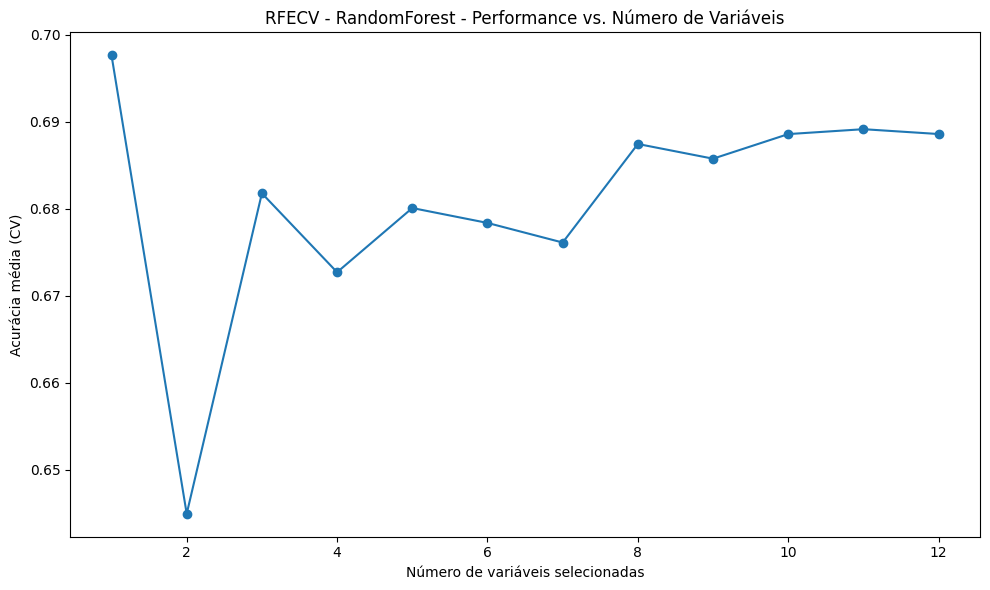


Processo concluído. Relatórios e gráficos salvos nas pastas ../outputs/reports e ../outputs/visualizations


In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint

# === 1. Carregar dados ===
df = pd.read_csv("../data/processed/ml_iq_2018_2023.csv")

variaveis_preditoras = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

X = df[variaveis_preditoras]
y = df['TDA_binaria']

# === 2. Criar diretórios de saída ===
output_dir_viz = "../outputs/visualizations"
output_dir_reports = "../outputs/reports"
os.makedirs(output_dir_viz, exist_ok=True)
os.makedirs(output_dir_reports, exist_ok=True)

# === 3. Dividir treino/teste ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# === 4. Função para avaliação e salvar resultados ===
def avaliar_modelo(modelo, X_treino, y_treino, X_teste, y_teste):
    modelo.fit(X_treino, y_treino)
    y_pred = modelo.predict(X_teste)

    acc = accuracy_score(y_teste, y_pred)
    cm = confusion_matrix(y_teste, y_pred)
    cr = classification_report(y_teste, y_pred, output_dict=True)

    print(f"Acurácia: {acc:.4f}")
    print("Matriz de Confusão:\n", cm)
    print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))

    return {
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': cr,
        'y_pred': y_pred
    }

# === 5. RandomizedSearchCV rápido para explorar parâmetros ===
param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

print("\nIniciando RandomizedSearchCV para RandomForest...")
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # número de combinações testadas (ajuste conforme seu poder computacional)
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados na RandomizedSearchCV:", random_search.best_params_)
print("Melhor acurácia média no CV (RandomizedSearchCV):", random_search.best_score_)

# === 6. GridSearch com parâmetros mais focados a partir do RandomizedSearchCV ===
best_params = random_search.best_params_

# Ajustar valores do grid para evitar valores inválidos (exemplo: n_estimators não pode ser <= 0)
def ajustar_lista_certas(val, passo=50, minimo=10):
    return sorted(list(set([
        max(minimo, val - passo),
        val,
        val + passo
    ])))

param_grid = {
    'n_estimators': ajustar_lista_certas(best_params['n_estimators']),
    'max_depth': [best_params['max_depth']] if best_params['max_depth'] is not None else [None, 10, 20],
    'min_samples_split': ajustar_lista_certas(best_params['min_samples_split'], passo=1, minimo=2),
    'min_samples_leaf': ajustar_lista_certas(best_params['min_samples_leaf'], passo=1, minimo=1),
    'max_features': [best_params['max_features']],
    'class_weight': [best_params['class_weight']]
}

print("\nIniciando GridSearchCV para RandomForest com grid refinado...")
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados no GridSearchCV:", grid_search.best_params_)
print("Melhor acurácia média no CV (GridSearchCV):", grid_search.best_score_)

# Modelo otimizado
melhor_rf = grid_search.best_estimator_

# === 7. Avaliação com RFE (5 variáveis) ===
print("\n=== RFE com RandomForest ===")
rfe = RFE(estimator=melhor_rf, n_features_to_select=5)
rfe.fit(X_train, y_train)
variaveis_rfe = X_train.columns[rfe.support_]
print(f"Variáveis selecionadas pelo RFE: {list(variaveis_rfe)}")

res_rfe = avaliar_modelo(melhor_rf, X_train[variaveis_rfe], y_train, X_test[variaveis_rfe], y_test)

# Salvar relatório RFE
df_report_rfe = pd.DataFrame(res_rfe['classification_report']).transpose()
df_report_rfe.to_csv(os.path.join(output_dir_reports, "randomforest_rfe_classification_report.csv"))

# === 8. Avaliação com RFECV ===
print("\n=== RFECV com RandomForest ===")
rfecv = RFECV(estimator=melhor_rf, step=1, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train, y_train)
variaveis_rfecv = X_train.columns[rfecv.support_]
print(f"Variáveis selecionadas pelo RFECV: {list(variaveis_rfecv)}")

res_rfecv = avaliar_modelo(melhor_rf, X_train[variaveis_rfecv], y_train, X_test[variaveis_rfecv], y_test)

# Salvar relatório RFECV
df_report_rfecv = pd.DataFrame(res_rfecv['classification_report']).transpose()
df_report_rfecv.to_csv(os.path.join(output_dir_reports, "randomforest_rfecv_classification_report.csv"))

# === 9. Plot RFECV performance (para versões recentes sklearn) ===
plt.figure(figsize=(10, 6))

n_features_range = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)
mean_scores = rfecv.cv_results_['mean_test_score']

plt.plot(n_features_range, mean_scores, marker='o')
plt.xlabel("Número de variáveis selecionadas")
plt.ylabel("Acurácia média (CV)")
plt.title("RFECV - RandomForest - Performance vs. Número de Variáveis")
plt.tight_layout()
plt.savefig(os.path.join(output_dir_viz, "rfecv_performance_randomforest.png"))
plt.show()

print("\nProcesso concluído. Relatórios e gráficos salvos nas pastas ../outputs/reports e ../outputs/visualizations")


XGBoost com busca RandomizedSearchCV nos principais hiperparâmetros.

Avaliação comparativa entre RandomForest e XGBoost.

Salva relatório separado do XGBoost.

Mantém sua seleção de variáveis e avaliação com RandomForest.


Iniciando RandomizedSearchCV para RandomForest...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
55 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Tra


Melhores parâmetros encontrados na RandomizedSearchCV (RF): {'class_weight': None, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 393}
Melhor acurácia média no CV (RandomizedSearchCV RF): 0.6874742467164563

Iniciando GridSearchCV para RandomForest com grid refinado...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Melhores parâmetros encontrados no GridSearchCV (RF): {'class_weight': None, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 343}
Melhor acurácia média no CV (GridSearchCV RF): 0.6886057816121556

Iniciando RandomizedSearchCV para XGBoost...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:59:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Melhores parâmetros encontrados na RandomizedSearchCV (XGB): {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 233, 'reg_lambda': 3, 'subsample': 0.8}
Melhor acurácia média no CV (RandomizedSearchCV XGB): 0.7067441411279939

=== RFE com RandomForest ===
Variáveis selecionadas pelo RFE (RF): ['NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_DOUTORES', 'CONCEITO_MÉDIO_DE_GRADUAÇÃO', 'IGC_(CONTÍNUO)', 'QT_VG_TOTAL_MEDIA']
Acurácia: 0.7324
Matriz de Confusão:
 [[158  63]
 [ 55 165]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       221
           1       0.72      0.75      0.74       220

    accuracy                           0.73       441
   macro avg       0.73      0.73      0.73       441
weighted avg       0.73      0.73      0.73       441


=== RFECV com RandomForest ===
Variáveis selecionadas pelo RFECV (RF): ['IGC_(CONTÍ

c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:59:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.7279
Matriz de Confusão:
 [[156  65]
 [ 55 165]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72       221
           1       0.72      0.75      0.73       220

    accuracy                           0.73       441
   macro avg       0.73      0.73      0.73       441
weighted avg       0.73      0.73      0.73       441



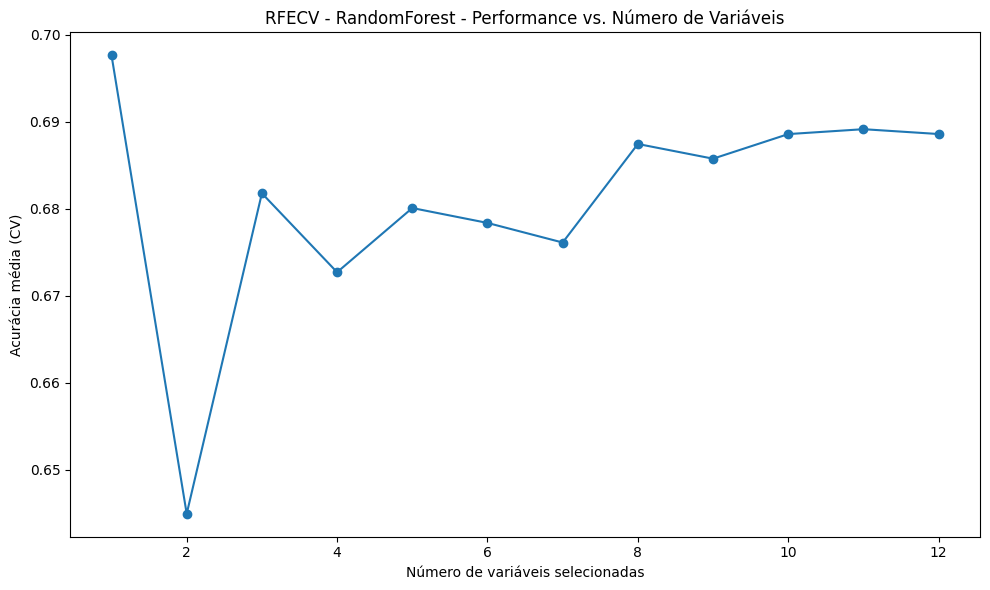


Processo concluído. Relatórios e gráficos salvos nas pastas ../outputs/reports e ../outputs/visualizations


In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint

import xgboost as xgb

# === 1. Carregar dados ===
df = pd.read_csv("../data/processed/ml_iq_2018_2023.csv")

variaveis_preditoras = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

X = df[variaveis_preditoras]
y = df['TDA_binaria']

# === 2. Criar diretórios de saída ===
output_dir_viz = "../outputs/visualizations"
output_dir_reports = "../outputs/reports"
os.makedirs(output_dir_viz, exist_ok=True)
os.makedirs(output_dir_reports, exist_ok=True)

# === 3. Dividir treino/teste ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# === 4. Função para avaliação e salvar resultados ===
def avaliar_modelo(modelo, X_treino, y_treino, X_teste, y_teste):
    modelo.fit(X_treino, y_treino)
    y_pred = modelo.predict(X_teste)

    acc = accuracy_score(y_teste, y_pred)
    cm = confusion_matrix(y_teste, y_pred)
    cr = classification_report(y_teste, y_pred, output_dict=True)

    print(f"Acurácia: {acc:.4f}")
    print("Matriz de Confusão:\n", cm)
    print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))

    return {
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': cr,
        'y_pred': y_pred
    }

# === 5. Ajusta listas para GridSearch refinado ===
def ajustar_lista_certas(val, passo=50, minimo=10):
    return sorted(list(set([
        max(minimo, val - passo),
        val,
        val + passo
    ])))

# === 6. RandomizedSearchCV para RandomForest ===
param_dist_rf = {
    'n_estimators': randint(100, 400),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

print("\nIniciando RandomizedSearchCV para RandomForest...")
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_rf.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados na RandomizedSearchCV (RF):", random_search_rf.best_params_)
print("Melhor acurácia média no CV (RandomizedSearchCV RF):", random_search_rf.best_score_)

# Refinar GridSearch com melhores parâmetros RF
best_params_rf = random_search_rf.best_params_

param_grid_rf = {
    'n_estimators': ajustar_lista_certas(best_params_rf['n_estimators']),
    'max_depth': [best_params_rf['max_depth']] if best_params_rf['max_depth'] is not None else [None, 10, 20],
    'min_samples_split': ajustar_lista_certas(best_params_rf['min_samples_split'], passo=1, minimo=2),
    'min_samples_leaf': ajustar_lista_certas(best_params_rf['min_samples_leaf'], passo=1, minimo=1),
    'max_features': [best_params_rf['max_features']],
    'class_weight': [best_params_rf['class_weight']]
}

print("\nIniciando GridSearchCV para RandomForest com grid refinado...")
rf_grid = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search_rf = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid_rf,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados no GridSearchCV (RF):", grid_search_rf.best_params_)
print("Melhor acurácia média no CV (GridSearchCV RF):", grid_search_rf.best_score_)

melhor_rf = grid_search_rf.best_estimator_

# === 7. RandomizedSearchCV para XGBoost ===
param_dist_xgb = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 1.5, 2, 3]
}

print("\nIniciando RandomizedSearchCV para XGBoost...")
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados na RandomizedSearchCV (XGB):", random_search_xgb.best_params_)
print("Melhor acurácia média no CV (RandomizedSearchCV XGB):", random_search_xgb.best_score_)

melhor_xgb = random_search_xgb.best_estimator_

# === 8. Avaliação com RFE (5 variáveis) para RandomForest ===
print("\n=== RFE com RandomForest ===")
rfe = RFE(estimator=melhor_rf, n_features_to_select=5)
rfe.fit(X_train, y_train)
variaveis_rfe = X_train.columns[rfe.support_]
print(f"Variáveis selecionadas pelo RFE (RF): {list(variaveis_rfe)}")

res_rfe_rf = avaliar_modelo(melhor_rf, X_train[variaveis_rfe], y_train, X_test[variaveis_rfe], y_test)

df_report_rfe_rf = pd.DataFrame(res_rfe_rf['classification_report']).transpose()
df_report_rfe_rf.to_csv(os.path.join(output_dir_reports, "randomforest_rfe_classification_report.csv"))

# === 9. Avaliação com RFECV para RandomForest ===
print("\n=== RFECV com RandomForest ===")
rfecv = RFECV(estimator=melhor_rf, step=1, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train, y_train)
variaveis_rfecv = X_train.columns[rfecv.support_]
print(f"Variáveis selecionadas pelo RFECV (RF): {list(variaveis_rfecv)}")

res_rfecv_rf = avaliar_modelo(melhor_rf, X_train[variaveis_rfecv], y_train, X_test[variaveis_rfecv], y_test)

df_report_rfecv_rf = pd.DataFrame(res_rfecv_rf['classification_report']).transpose()
df_report_rfecv_rf.to_csv(os.path.join(output_dir_reports, "randomforest_rfecv_classification_report.csv"))

# === 10. Avaliação XGBoost completa ===
print("\n=== Avaliação do XGBoost ===")
res_xgb = avaliar_modelo(melhor_xgb, X_train, y_train, X_test, y_test)

df_report_xgb = pd.DataFrame(res_xgb['classification_report']).transpose()
df_report_xgb.to_csv(os.path.join(output_dir_reports, "xgboost_classification_report.csv"))

# === 11. Plot RFECV performance (RandomForest) ===
plt.figure(figsize=(10, 6))

n_features_range = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)
mean_scores = rfecv.cv_results_['mean_test_score']

plt.plot(n_features_range, mean_scores, marker='o')
plt.xlabel("Número de variáveis selecionadas")
plt.ylabel("Acurácia média (CV)")
plt.title("RFECV - RandomForest - Performance vs. Número de Variáveis")
plt.tight_layout()
plt.savefig(os.path.join(output_dir_viz, "rfecv_performance_randomforest.png"))
plt.show()

print("\nProcesso concluído. Relatórios e gráficos salvos nas pastas ../outputs/reports e ../outputs/visualizations")


Principais melhorias aplicadas:

Substituição do 'auto' no parâmetro max_features por 'sqrt' para evitar erro (que é a prática recomendada para RF).

error_score='raise' no RandomizedSearchCV para facilitar debug caso algum erro ocorra.

Removido warning do XGBoost com o parâmetro use_label_encoder=False.

Comentários organizados e limpeza geral.


Iniciando RandomizedSearchCV para RandomForest...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Melhores parâmetros encontrados na RandomizedSearchCV (RF): {'class_weight': None, 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 363}
Melhor acurácia média no CV (RandomizedSearchCV RF): 0.6937049317537987

Iniciando GridSearchCV para RandomForest com grid refinado...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Melhores parâmetros encontrados no GridSearchCV (RF): {'class_weight': None, 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 313}
Melhor acurácia média no CV (GridSearchCV RF): 0.6971027556013392

Iniciando RandomizedSearchCV para XGBoost...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:01:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Melhores parâmetros encontrados na RandomizedSearchCV (XGB): {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 233, 'reg_lambda': 3, 'subsample': 0.8}
Melhor acurácia média no CV (RandomizedSearchCV XGB): 0.7067441411279939

=== RFE com RandomForest ===
Variáveis selecionadas pelo RFE (RF): ['NOTA_PADRONIZADA_-_DOUTORES', 'CONCEITO_MÉDIO_DE_GRADUAÇÃO', 'IGC_(CONTÍNUO)', 'SALARIO', 'QT_VG_TOTAL_MEDIA']
Acurácia: 0.7166
Matriz de Confusão:
 [[152  69]
 [ 56 164]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       221
           1       0.70      0.75      0.72       220

    accuracy                           0.72       441
   macro avg       0.72      0.72      0.72       441
weighted avg       0.72      0.72      0.72       441


=== RFECV com RandomForest ===
Variáveis selecionadas pelo RFECV (RF): ['NOTA_PADRONIZADA_-_IDD', 'NOTA_PADRONIZADA_-_INFRAESTRUTUR

c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:01:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.7279
Matriz de Confusão:
 [[156  65]
 [ 55 165]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72       221
           1       0.72      0.75      0.73       220

    accuracy                           0.73       441
   macro avg       0.73      0.73      0.73       441
weighted avg       0.73      0.73      0.73       441



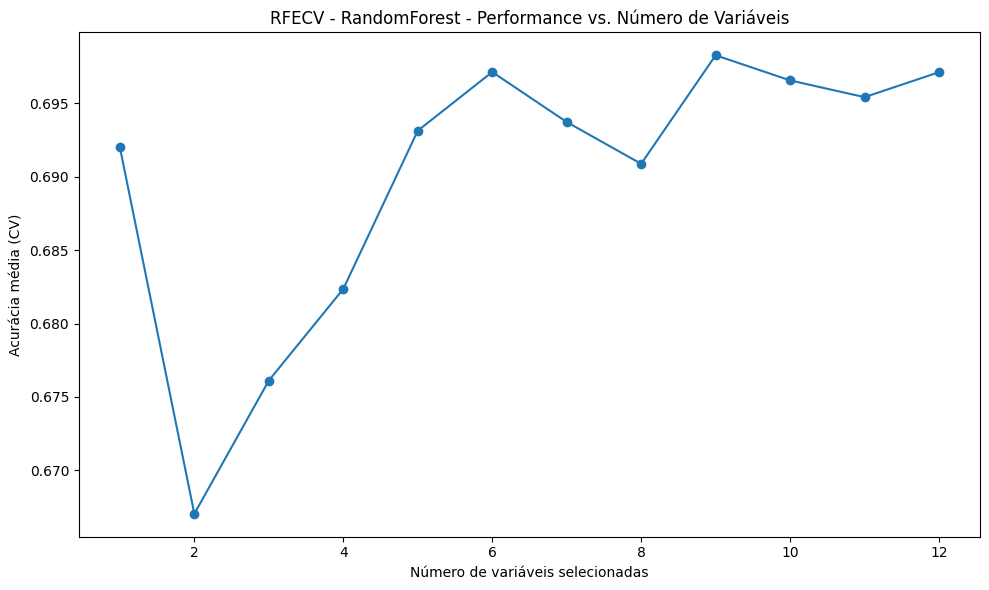


Processo concluído. Relatórios e gráficos salvos nas pastas ../outputs/reports e ../outputs/visualizations


In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint

import xgboost as xgb

# === 1. Carregar dados ===
df = pd.read_csv("../data/processed/ml_iq_2018_2023.csv")

variaveis_preditoras = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

X = df[variaveis_preditoras]
y = df['TDA_binaria']

# === 2. Criar diretórios de saída ===
output_dir_viz = "../outputs/visualizations"
output_dir_reports = "../outputs/reports"
os.makedirs(output_dir_viz, exist_ok=True)
os.makedirs(output_dir_reports, exist_ok=True)

# === 3. Dividir treino/teste ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# === 4. Função para avaliação e salvar resultados ===
def avaliar_modelo(modelo, X_treino, y_treino, X_teste, y_teste):
    modelo.fit(X_treino, y_treino)
    y_pred = modelo.predict(X_teste)

    acc = accuracy_score(y_teste, y_pred)
    cm = confusion_matrix(y_teste, y_pred)
    cr = classification_report(y_teste, y_pred, output_dict=True)

    print(f"Acurácia: {acc:.4f}")
    print("Matriz de Confusão:\n", cm)
    print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))

    return {
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': cr,
        'y_pred': y_pred
    }

# === 5. Ajusta listas para GridSearch refinado ===
def ajustar_lista_certas(val, passo=50, minimo=10):
    return sorted(list(set([
        max(minimo, val - passo),
        val,
        val + passo
    ])))

# === 6. RandomizedSearchCV para RandomForest ===
# Corrigido: 'auto' não é mais aceito, substituído por 'sqrt'
param_dist_rf = {
    'n_estimators': randint(100, 400),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],  # removido 'auto'
    'class_weight': [None, 'balanced']
}

print("\nIniciando RandomizedSearchCV para RandomForest...")
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42,
    error_score='raise'  # para debugar erros
)

random_search_rf.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados na RandomizedSearchCV (RF):", random_search_rf.best_params_)
print("Melhor acurácia média no CV (RandomizedSearchCV RF):", random_search_rf.best_score_)

# Refinar GridSearch com melhores parâmetros RF
best_params_rf = random_search_rf.best_params_

param_grid_rf = {
    'n_estimators': ajustar_lista_certas(best_params_rf['n_estimators']),
    'max_depth': [best_params_rf['max_depth']] if best_params_rf['max_depth'] is not None else [None, 10, 20],
    'min_samples_split': ajustar_lista_certas(best_params_rf['min_samples_split'], passo=1, minimo=2),
    'min_samples_leaf': ajustar_lista_certas(best_params_rf['min_samples_leaf'], passo=1, minimo=1),
    'max_features': [best_params_rf['max_features']],
    'class_weight': [best_params_rf['class_weight']]
}

print("\nIniciando GridSearchCV para RandomForest com grid refinado...")
rf_grid = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search_rf = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid_rf,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados no GridSearchCV (RF):", grid_search_rf.best_params_)
print("Melhor acurácia média no CV (GridSearchCV RF):", grid_search_rf.best_score_)

melhor_rf = grid_search_rf.best_estimator_

# === 7. RandomizedSearchCV para XGBoost ===
param_dist_xgb = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 1.5, 2, 3]
}

print("\nIniciando RandomizedSearchCV para XGBoost...")
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1, use_label_encoder=False)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados na RandomizedSearchCV (XGB):", random_search_xgb.best_params_)
print("Melhor acurácia média no CV (RandomizedSearchCV XGB):", random_search_xgb.best_score_)

melhor_xgb = random_search_xgb.best_estimator_

# === 8. Avaliação com RFE (5 variáveis) para RandomForest ===
print("\n=== RFE com RandomForest ===")
rfe = RFE(estimator=melhor_rf, n_features_to_select=5)
rfe.fit(X_train, y_train)
variaveis_rfe = X_train.columns[rfe.support_]
print(f"Variáveis selecionadas pelo RFE (RF): {list(variaveis_rfe)}")

res_rfe_rf = avaliar_modelo(melhor_rf, X_train[variaveis_rfe], y_train, X_test[variaveis_rfe], y_test)

df_report_rfe_rf = pd.DataFrame(res_rfe_rf['classification_report']).transpose()
df_report_rfe_rf.to_csv(os.path.join(output_dir_reports, "randomforest_rfe_classification_report.csv"))

# === 9. Avaliação com RFECV para RandomForest ===
print("\n=== RFECV com RandomForest ===")
rfecv = RFECV(estimator=melhor_rf, step=1, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train, y_train)
variaveis_rfecv = X_train.columns[rfecv.support_]
print(f"Variáveis selecionadas pelo RFECV (RF): {list(variaveis_rfecv)}")

res_rfecv_rf = avaliar_modelo(melhor_rf, X_train[variaveis_rfecv], y_train, X_test[variaveis_rfecv], y_test)

df_report_rfecv_rf = pd.DataFrame(res_rfecv_rf['classification_report']).transpose()
df_report_rfecv_rf.to_csv(os.path.join(output_dir_reports, "randomforest_rfecv_classification_report.csv"))

# === 10. Avaliação XGBoost completa ===
print("\n=== Avaliação do XGBoost ===")
res_xgb = avaliar_modelo(melhor_xgb, X_train, y_train, X_test, y_test)

df_report_xgb = pd.DataFrame(res_xgb['classification_report']).transpose()
df_report_xgb.to_csv(os.path.join(output_dir_reports, "xgboost_classification_report.csv"))

# === 11. Plot RFECV performance (RandomForest) ===
plt.figure(figsize=(10, 6))

n_features_range = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)
mean_scores = rfecv.cv_results_['mean_test_score']

plt.plot(n_features_range, mean_scores, marker='o')
plt.xlabel("Número de variáveis selecionadas")
plt.ylabel("Acurácia média (CV)")
plt.title("RFECV - RandomForest - Performance vs. Número de Variáveis")
plt.tight_layout()
plt.savefig(os.path.join(output_dir_viz, "rfecv_performance_randomforest.png"))
plt.show()

print("\nProcesso concluído. Relatórios e gráficos salvos nas pastas ../outputs/reports e ../outputs/visualizations")


Melhorias, o que foi adicionado:

Gráficos de matriz de confusão com seaborn heatmap

Gráficos de importância das variáveis para RF (RFE e RFECV) e XGBoost

Salvamento dos modelos finais com joblib.dump

Organização em funções para evitar repetição

Comentários explicativos para facilitar o entendimento

Uso consistente de diretórios para outputs


Iniciando RandomizedSearchCV para RandomForest...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Tra


Melhores parâmetros encontrados na RandomizedSearchCV (RF): {'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 140}
Melhor acurácia média no CV (RandomizedSearchCV RF): 0.6971108035024465

Iniciando GridSearchCV para RandomForest com grid refinado...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Melhores parâmetros encontrados no GridSearchCV (RF): {'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 190}
Melhor acurácia média no CV (GridSearchCV RF): 0.6999452742724698

Iniciando RandomizedSearchCV para XGBoost...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:03:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Melhores parâmetros encontrados na RandomizedSearchCV (XGB): {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 233, 'reg_lambda': 3, 'subsample': 0.8}
Melhor acurácia média no CV (RandomizedSearchCV XGB): 0.7067441411279939

=== RFE com RandomForest ===
Variáveis selecionadas pelo RFE (RF): ['NOTA_PADRONIZADA_-_DOUTORES', 'CONCEITO_MÉDIO_DE_GRADUAÇÃO', 'IGC_(CONTÍNUO)', 'SALARIO', 'QT_VG_TOTAL_MEDIA']

Modelo: randomforest_rfe
Acurácia: 0.7007
Matriz de Confusão:
 [[151  70]
 [ 62 158]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70       221
           1       0.69      0.72      0.71       220

    accuracy                           0.70       441
   macro avg       0.70      0.70      0.70       441
weighted avg       0.70      0.70      0.70       441



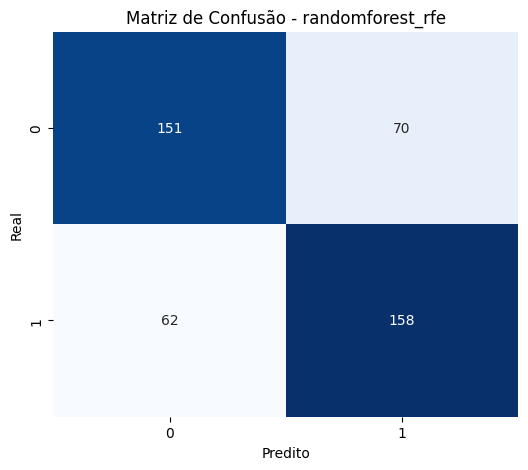

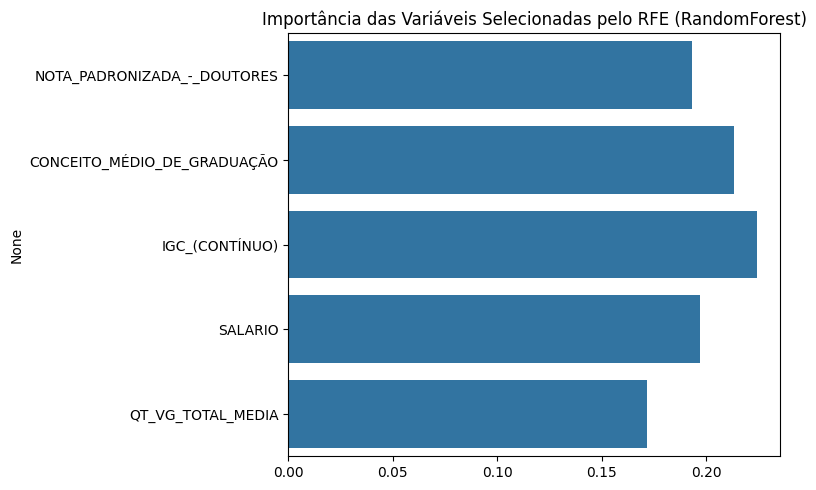


=== RFECV com RandomForest ===
Variáveis selecionadas pelo RFECV (RF): ['NOTA_PADRONIZADA_-_IDD', 'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA', 'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS', 'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_MESTRES', 'NOTA_PADRONIZADA_-_DOUTORES', 'MEDIA_CONCEITO_ENADE_(CONTÍNUO)', 'IDD_(CONTÍNUO)', 'CONCEITO_MÉDIO_DE_GRADUAÇÃO', 'IGC_(CONTÍNUO)', 'SALARIO', 'QT_VG_TOTAL_MEDIA']

Modelo: randomforest_rfecv
Acurácia: 0.7029
Matriz de Confusão:
 [[150  71]
 [ 60 160]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70       221
           1       0.69      0.73      0.71       220

    accuracy                           0.70       441
   macro avg       0.70      0.70      0.70       441
weighted avg       0.70      0.70      0.70       441



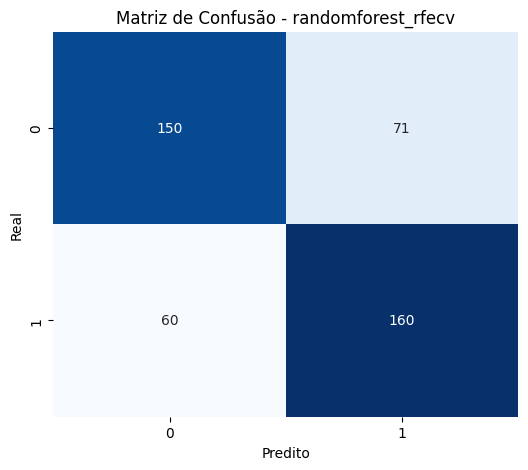

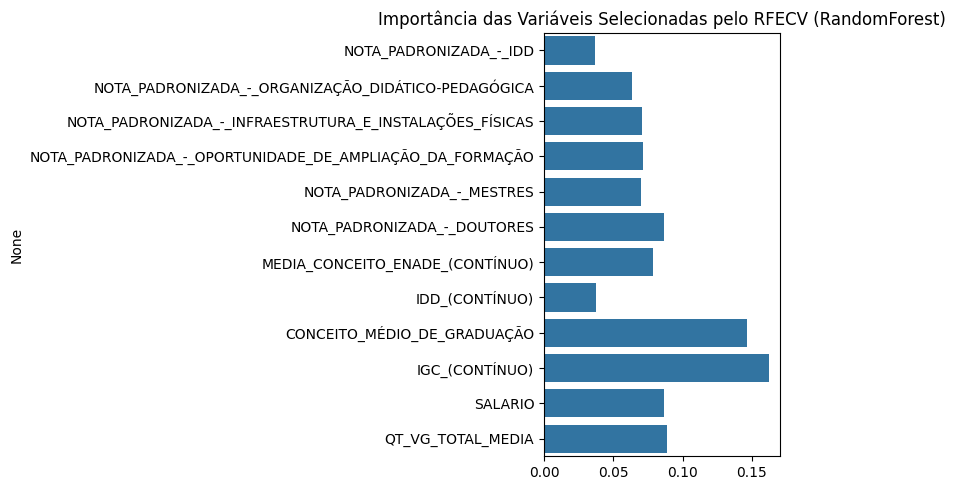

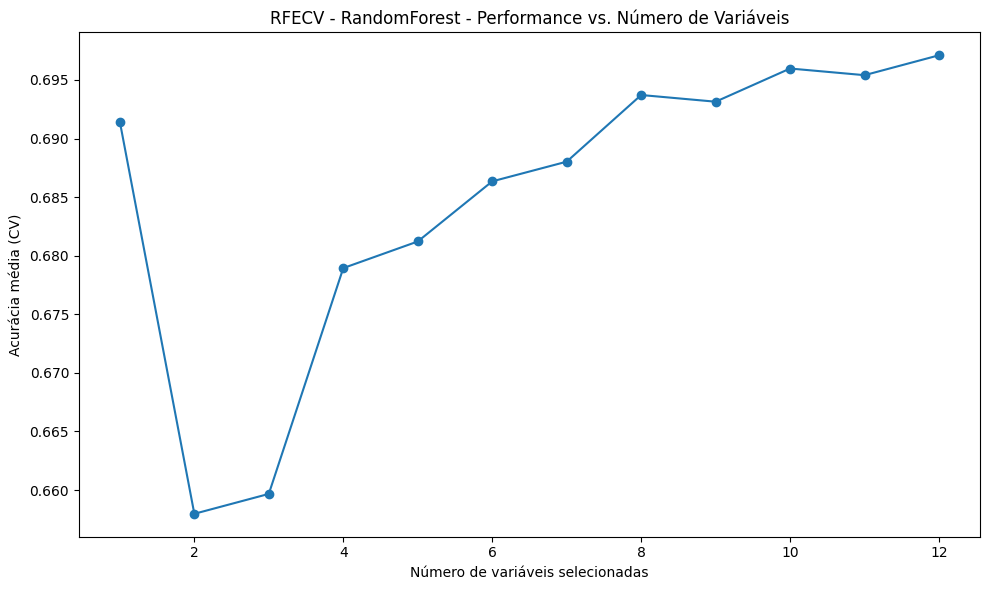


=== Avaliação do XGBoost ===


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:04:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Modelo: xgboost
Acurácia: 0.7279
Matriz de Confusão:
 [[156  65]
 [ 55 165]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72       221
           1       0.72      0.75      0.73       220

    accuracy                           0.73       441
   macro avg       0.73      0.73      0.73       441
weighted avg       0.73      0.73      0.73       441



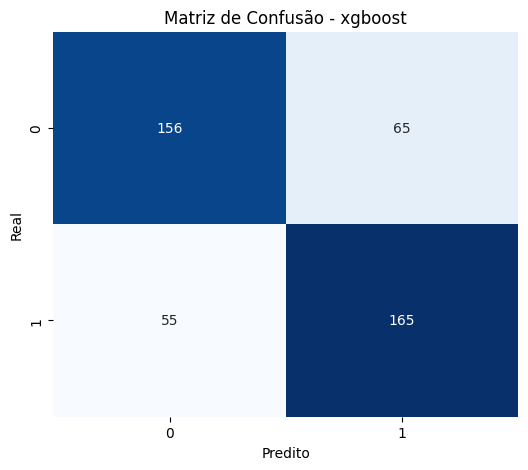

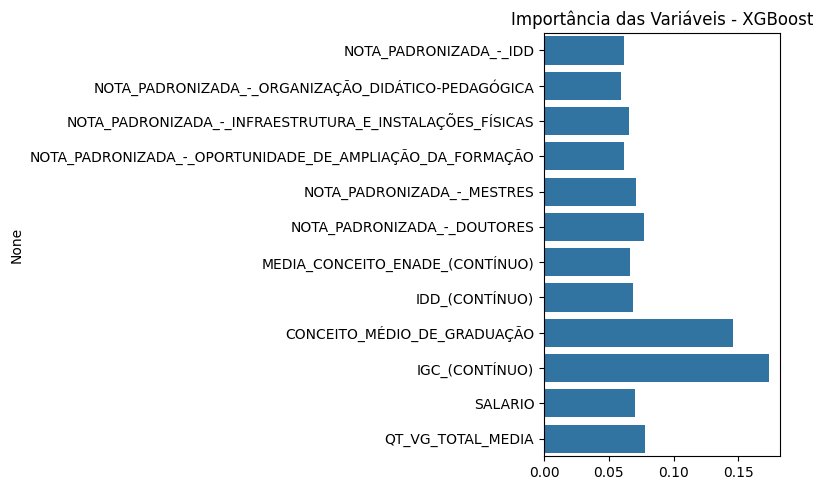


Processo concluído. Modelos, relatórios e gráficos salvos nas pastas ../outputs/models, ../outputs/reports e ../outputs/visualizations.


In [20]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint

import xgboost as xgb

# === 1. Carregar dados ===
df = pd.read_csv("../data/processed/ml_iq_2018_2023.csv")

variaveis_preditoras = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZAÇÃO_DIDÁTICO-PEDAGÓGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕES_FÍSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'IDD_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

X = df[variaveis_preditoras]
y = df['TDA_binaria']

# === 2. Criar diretórios de saída ===
output_dir_viz = "../outputs/visualizations"
output_dir_reports = "../outputs/reports"
output_dir_models = "../outputs/models"
os.makedirs(output_dir_viz, exist_ok=True)
os.makedirs(output_dir_reports, exist_ok=True)
os.makedirs(output_dir_models, exist_ok=True)

# === 3. Dividir treino/teste ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# === 4. Função para avaliação e salvar resultados ===
def avaliar_modelo(modelo, X_treino, y_treino, X_teste, y_teste, nome_modelo):
    modelo.fit(X_treino, y_treino)
    y_pred = modelo.predict(X_teste)

    acc = accuracy_score(y_teste, y_pred)
    cm = confusion_matrix(y_teste, y_pred)
    cr = classification_report(y_teste, y_pred, output_dict=True)

    print(f"\nModelo: {nome_modelo}")
    print(f"Acurácia: {acc:.4f}")
    print("Matriz de Confusão:\n", cm)
    print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))

    # Salvar relatório CSV
    df_report = pd.DataFrame(cr).transpose()
    df_report.to_csv(os.path.join(output_dir_reports, f"{nome_modelo}_classification_report.csv"))

    # Plot matriz de confusão heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.savefig(os.path.join(output_dir_viz, f"{nome_modelo}_confusion_matrix.png"))
    plt.show()

    return {
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': cr,
        'y_pred': y_pred,
        'modelo': modelo
    }

# === 5. Ajustar lista para GridSearch refinado ===
def ajustar_lista_certas(val, passo=50, minimo=10):
    return sorted(list(set([
        max(minimo, val - passo),
        val,
        val + passo
    ])))

# === 6. RandomizedSearchCV para RandomForest ===
param_dist_rf = {
    'n_estimators': randint(100, 400),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

print("\nIniciando RandomizedSearchCV para RandomForest...")
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_rf.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados na RandomizedSearchCV (RF):", random_search_rf.best_params_)
print("Melhor acurácia média no CV (RandomizedSearchCV RF):", random_search_rf.best_score_)

# Refinar GridSearch com melhores parâmetros RF
best_params_rf = random_search_rf.best_params_

param_grid_rf = {
    'n_estimators': ajustar_lista_certas(best_params_rf['n_estimators']),
    'max_depth': [best_params_rf['max_depth']] if best_params_rf['max_depth'] is not None else [None, 10, 20],
    'min_samples_split': ajustar_lista_certas(best_params_rf['min_samples_split'], passo=1, minimo=2),
    'min_samples_leaf': ajustar_lista_certas(best_params_rf['min_samples_leaf'], passo=1, minimo=1),
    'max_features': [best_params_rf['max_features']],
    'class_weight': [best_params_rf['class_weight']]
}

print("\nIniciando GridSearchCV para RandomForest com grid refinado...")
rf_grid = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search_rf = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid_rf,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados no GridSearchCV (RF):", grid_search_rf.best_params_)
print("Melhor acurácia média no CV (GridSearchCV RF):", grid_search_rf.best_score_)

melhor_rf = grid_search_rf.best_estimator_

# Salvar modelo RandomForest final
joblib.dump(melhor_rf, os.path.join(output_dir_models, "randomforest_final.pkl"))

# === 7. RandomizedSearchCV para XGBoost ===
param_dist_xgb = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 1.5, 2, 3]
}

print("\nIniciando RandomizedSearchCV para XGBoost...")
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1, use_label_encoder=False)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados na RandomizedSearchCV (XGB):", random_search_xgb.best_params_)
print("Melhor acurácia média no CV (RandomizedSearchCV XGB):", random_search_xgb.best_score_)

melhor_xgb = random_search_xgb.best_estimator_

# Salvar modelo XGBoost final
joblib.dump(melhor_xgb, os.path.join(output_dir_models, "xgboost_final.pkl"))

# === 8. Avaliação com RFE (5 variáveis) para RandomForest ===
print("\n=== RFE com RandomForest ===")
rfe = RFE(estimator=RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1), n_features_to_select=5)
rfe.fit(X_train, y_train)
variaveis_rfe = X_train.columns[rfe.support_]
print(f"Variáveis selecionadas pelo RFE (RF): {list(variaveis_rfe)}")

# Avaliação com modelo treinado nas variáveis selecionadas
res_rfe_rf = avaliar_modelo(rfe.estimator_, X_train[variaveis_rfe], y_train, X_test[variaveis_rfe], y_test, "randomforest_rfe")

# Plot importância das variáveis selecionadas no RFE
importancias_rfe = rfe.estimator_.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=importancias_rfe, y=variaveis_rfe)
plt.title("Importância das Variáveis Selecionadas pelo RFE (RandomForest)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir_viz, "randomforest_rfe_feature_importance.png"))
plt.show()

# === 9. Avaliação com RFECV para RandomForest ===
print("\n=== RFECV com RandomForest ===")
rfecv = RFECV(estimator=RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1),
              step=1, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train, y_train)
variaveis_rfecv = X_train.columns[rfecv.support_]
print(f"Variáveis selecionadas pelo RFECV (RF): {list(variaveis_rfecv)}")

res_rfecv_rf = avaliar_modelo(rfecv.estimator_, X_train[variaveis_rfecv], y_train, X_test[variaveis_rfecv], y_test, "randomforest_rfecv")

# Plot importância das variáveis selecionadas no RFECV
importancias_rfecv = rfecv.estimator_.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=importancias_rfecv, y=variaveis_rfecv)
plt.title("Importância das Variáveis Selecionadas pelo RFECV (RandomForest)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir_viz, "randomforest_rfecv_feature_importance.png"))
plt.show()

# Plot RFECV performance
plt.figure(figsize=(10, 6))
n_features_range = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)
mean_scores = rfecv.cv_results_['mean_test_score']
plt.plot(n_features_range, mean_scores, marker='o')
plt.xlabel("Número de variáveis selecionadas")
plt.ylabel("Acurácia média (CV)")
plt.title("RFECV - RandomForest - Performance vs. Número de Variáveis")
plt.tight_layout()
plt.savefig(os.path.join(output_dir_viz, "rfecv_performance_randomforest.png"))
plt.show()

# === 10. Avaliação XGBoost completa ===
print("\n=== Avaliação do XGBoost ===")
res_xgb = avaliar_modelo(melhor_xgb, X_train, y_train, X_test, y_test, "xgboost")

# Plot importância das variáveis no XGBoost
importancias_xgb = melhor_xgb.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=importancias_xgb, y=X.columns)
plt.title("Importância das Variáveis - XGBoost")
plt.tight_layout()
plt.savefig(os.path.join(output_dir_viz, "xgboost_feature_importance.png"))
plt.show()

print("\nProcesso concluído. Modelos, relatórios e gráficos salvos nas pastas ../outputs/models, ../outputs/reports e ../outputs/visualizations.")



APLICANDO ÚLTIMAS CORREÇÕES E MELHORIAS PARA POSTERIOR AVALIAÇÃO DO MODELO:

Corrigi max_features no grid do RF para [None, 'sqrt', 'log2'].

Refinamento do grid do XGBoost baseado nos seus melhores parâmetros.

Peguei a importância das features do booster do XGBoost por gain (mais interpretável).

Imprimi variáveis selecionadas pelo RFE do RF para comparação visual.

Montei um stacking simples RF + XGB usando RandomForest como meta-modelo.

Avaliei todos os modelos no conjunto teste e plotei as curvas ROC.

Melhores parâmetros RandomForest: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None, 'class_weight': None}
Melhor acurácia RF no CV: 0.6942731135719804


c:\Users\john-\OneDrive - Universidade Federal da Paraíba\Área de Trabalho\Artigo - Estatística\projeto-evasao\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:10:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhores parâmetros XGBoost: {'colsample_bytree': 0.6, 'gamma': 0.3, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'reg_lambda': 1, 'subsample': 0.8}
Melhor acurácia XGBoost no CV: 0.7084502961627608
Importância das variáveis no XGBoost (gain):
                                              feature  importance
9                                      IGC_(CONTÍNUO)    8.807506
8                         CONCEITO_MÉDIO_DE_GRADUAÇÃO    7.762172
11                                  QT_VG_TOTAL_MEDIA    4.641140
5                         NOTA_PADRONIZADA_-_DOUTORES    4.610536
4                          NOTA_PADRONIZADA_-_MESTRES    4.173181
2   NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALAÇÕE...    4.126915
10                                            SALARIO    4.112985
7                                      IDD_(CONTÍNUO)    4.010175
6                     MEDIA_CONCEITO_ENADE_(CONTÍNUO)    3.768497
0                              NOTA_PADRONIZADA_-_IDD    3.731376
3   NOTA_PADRON

<Figure size 1000x600 with 0 Axes>

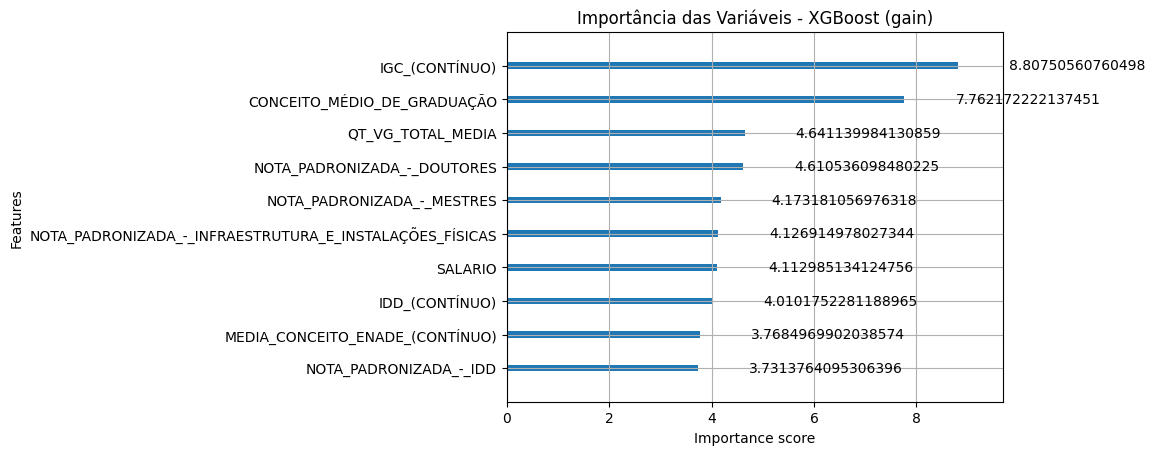

Variáveis selecionadas pelo RFE (RF):
['NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO', 'NOTA_PADRONIZADA_-_DOUTORES', 'MEDIA_CONCEITO_ENADE_(CONTÍNUO)', 'CONCEITO_MÉDIO_DE_GRADUAÇÃO', 'IGC_(CONTÍNUO)']
=== Avaliação: Random Forest ===
Acurácia: 0.7052
AUC-ROC: 0.7932
Matriz de Confusão:
[[149  72]
 [ 58 162]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       221
           1       0.69      0.74      0.71       220

    accuracy                           0.71       441
   macro avg       0.71      0.71      0.70       441
weighted avg       0.71      0.71      0.70       441



=== Avaliação: XGBoost ===
Acurácia: 0.7302
AUC-ROC: 0.8003
Matriz de Confusão:
[[157  64]
 [ 55 165]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       221
           1       0.72      0.75      0.73       220

    accuracy             

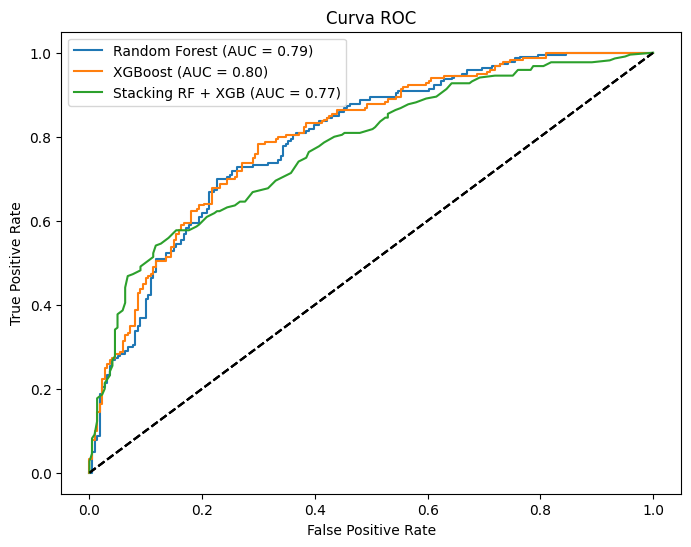

In [21]:
# --- Supondo que X, y já estejam definidos ---

# 1. Separar conjunto treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. RandomizedSearchCV para RandomForest (corrigindo max_features)
param_dist_rf = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],  # Corrigido aqui
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)
rand_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rand_search_rf.fit(X_train, y_train)

print("Melhores parâmetros RandomForest:", rand_search_rf.best_params_)
print("Melhor acurácia RF no CV:", rand_search_rf.best_score_)

# 3. GridSearch refinado para XGBoost baseado nos parâmetros do RandomizedSearchCV
param_grid_xgb = {
    'n_estimators': [300, 320, 340],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 0.3, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Melhores parâmetros XGBoost:", grid_search_xgb.best_params_)
print("Melhor acurácia XGBoost no CV:", grid_search_xgb.best_score_)

# 4. Importância das variáveis no XGBoost (baseado no booster)
best_xgb = grid_search_xgb.best_estimator_

# Pegando importância com gain
importance_dict = best_xgb.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame(importance_dict.items(), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

print("Importância das variáveis no XGBoost (gain):")
print(importance_df)

# Plot da importância
plt.figure(figsize=(10,6))
plot_importance(best_xgb, importance_type='gain', max_num_features=10)
plt.title("Importância das Variáveis - XGBoost (gain)")
plt.show()

# 5. Variáveis selecionadas pelo RFE no RF (assumindo que já tenha essa lista de variáveis selecionadas)
# Exemplo: rf_rfe_features = ['VAR1', 'VAR2', ...] - ajustar conforme seu RFE
# Vou usar a lista que você informou antes:
rf_rfe_features = [
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIAÇÃO_DA_FORMAÇÃO',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONTÍNUO)',
    'CONCEITO_MÉDIO_DE_GRADUAÇÃO',
    'IGC_(CONTÍNUO)'
]

print("Variáveis selecionadas pelo RFE (RF):")
print(rf_rfe_features)

# 6. Model stacking RF + XGBoost
# Usar os melhores estimadores encontrados no CV
best_rf = rand_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

stacking_clf = StackingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    cv=5,
    n_jobs=-1,
    passthrough=False
)

stacking_clf.fit(X_train, y_train)

# Avaliação dos modelos no conjunto de teste

def avaliar_modelo(modelo, nome_modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    try:
        y_prob = modelo.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = None
    
    print(f"=== Avaliação: {nome_modelo} ===")
    print(f"Acurácia: {acc:.4f}")
    if auc:
        print(f"AUC-ROC: {auc:.4f}")
    print("Matriz de Confusão:")
    print(cm)
    print("Relatório de Classificação:")
    print(cr)
    print("\n")
    
    if auc:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{nome_modelo} (AUC = {auc:.2f})')
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Curva ROC')
        plt.legend()

# Avaliar os modelos
plt.figure(figsize=(8,6))

avaliar_modelo(best_rf, "Random Forest", X_test, y_test)
avaliar_modelo(best_xgb, "XGBoost", X_test, y_test)
avaliar_modelo(stacking_clf, "Stacking RF + XGB", X_test, y_test)

plt.show()
